# Linear Classification

In [78]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# importando dataset
from sklearn import datasets
iris = datasets.load_iris()

In [80]:
X_iris, y_iris= iris.data, iris.target

In [81]:
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [82]:
print(X_iris[0], y_iris[0])
# y = (0: setosa, 1: versicolor, 2: virginica)

[5.1 3.5 1.4 0.2] 0


In [83]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [84]:
# Pegar apenas os dois primeiros atributos do dateset (sepal length e width)
X, y = X_iris[:, :2], y_iris

In [85]:
print(X[0])

[5.1 3.5]


In [86]:
# Dividir o dataset entre train e test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size=0.25, random_state=33)

In [87]:
# Verificando o tamanho do dataset
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [88]:
# Padronizando
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
colors = ['red', 'greenyellow', 'blue']

Text(0,0.5,'Sepal width')

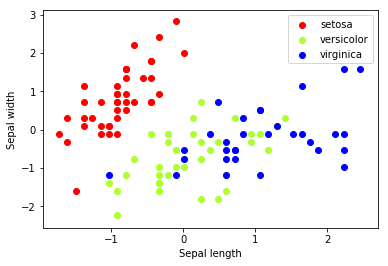

In [90]:
for i in range(len(colors)):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [91]:
# Definindo o objeto classificador

In [92]:
from sklearn.linear_model import SGDClassifier

In [93]:
clf = SGDClassifier()

In [94]:
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [95]:
#Prevendo
print(clf.predict(scaler.transform([[4.7, 3.1]])))

[0]


In [96]:
# Avaliando os resultados
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6842105263157895


In [100]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [101]:
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])

In [111]:
cv = KFold(n_splits=5, shuffle=True, random_state=33)

In [112]:
scores = cross_val_score(clf, X, y, cv=cv)

C:\ProgramData\Anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Futur

In [113]:
print(scores)

[0.7        0.7        0.8        0.83333333 0.56666667]
